## Players position analysis 

In [2]:
from matplotlib.pyplot import GridSpec
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, sys
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)

import missingno as msno
import pandas_profiling

from sklearn.datasets import make_blobs
import time

In [3]:
fifa=pd.read_csv('fifa19_data.csv')

In [4]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [6]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
fifa.columns=fifa.columns.str.replace(' ','')
fifa.columns

Index(['Unnamed:0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'ClubLogo', 'Value', 'Wage', 'Special',
       'PreferredFoot', 'InternationalReputation', 'WeakFoot', 'SkillMoves',
       'WorkRate', 'BodyType', 'RealFace', 'Position', 'JerseyNumber',
       'Joined', 'LoanedFrom', 'ContractValidUntil', 'Height', 'Weight', 'LS',
       'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
       'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDi

In [8]:
def load_subgroup(filename, index_col=[0]):
    return pd.read_csv(filename, compression='gzip', index_col=index_col)

In [9]:
ppos = load_subgroup("player_players.csv.gz")

In [10]:
ppos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16432 entries, 16 to 246620
Data columns (total 11 columns):
Name                       16432 non-null object
Age                        16432 non-null int64
Nationality                16432 non-null object
Position                   16378 non-null object
Potential                  16432 non-null int64
Club                       16208 non-null object
InternationalReputation    16388 non-null float64
WeakFoot                   16388 non-null float64
SkillMoves                 16388 non-null float64
WorkRate                   16388 non-null object
ContractValidUntil         16164 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 1.5+ MB


In [11]:
ppos.head()

,Name,Age,Nationality,Position,Potential,Club,InternationalReputation,WeakFoot,SkillMoves,WorkRate,ContractValidUntil
ID,,,,,,,,,,,
16,Luis García,37,Spain,RCM,71,KAS Eupen,1.0,4.0,3.0,Medium/ Medium,2019
41,Iniesta,34,Spain,LF,86,Vissel Kobe,4.0,4.0,4.0,High/ Medium,2021
80,E. Belözoğlu,37,Turkey,CM,79,Medipol Başakşehir FK,2.0,4.0,4.0,Medium/ Medium,2019
164,G. Pinzi,37,Italy,LCM,70,Padova,2.0,3.0,3.0,Low/ High,2019
657,D. Vaughan,35,Wales,CDM,66,Notts County,1.0,3.0,2.0,Medium/ High,2019


In [652]:
# ppos.groupby('Nationality').filter(lambda x : len(x)>3)

In [13]:
vc = ppos['Nationality'].value_counts()
#u  = [i not in set(vc[vc==1].index) for i in df['Series']]
#df = df[u]


In [14]:
u  = [i not in set(vc[vc<=11].index) for i in ppos['Nationality']]


In [15]:
ppos = ppos[u]

In [16]:
ppos.Nationality.value_counts()

England                1412
Germany                1153
Spain                   967
France                  863
Argentina               779
Brazil                  717
Italy                   682
Netherlands             446
Japan                   440
Colombia                438
China PR                380
Sweden                  363
Poland                  340
Republic of Ireland     327
Korea Republic          325
Norway                  321
Chile                   317
Denmark                 312
Saudi Arabia            311
United States           309
Austria                 294
Portugal                291
Turkey                  283
Belgium                 257
Mexico                  257
Scotland                249
Switzerland             212
Australia               211
Croatia                 122
Uruguay                 121
                       ... 
Tunisia                  32
Kosovo                   32
Bulgaria                 32
Mali                     31
Ecuador             

In [657]:
ppos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16180 entries, 16 to 246620
Data columns (total 11 columns):
Name                       16180 non-null object
Age                        16180 non-null int64
Nationality                16180 non-null object
Position                   16126 non-null object
Potential                  16180 non-null int64
Club                       15956 non-null object
InternationalReputation    16136 non-null float64
WeakFoot                   16136 non-null float64
SkillMoves                 16136 non-null float64
WorkRate                   16136 non-null object
ContractValidUntil         15912 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 1.5+ MB


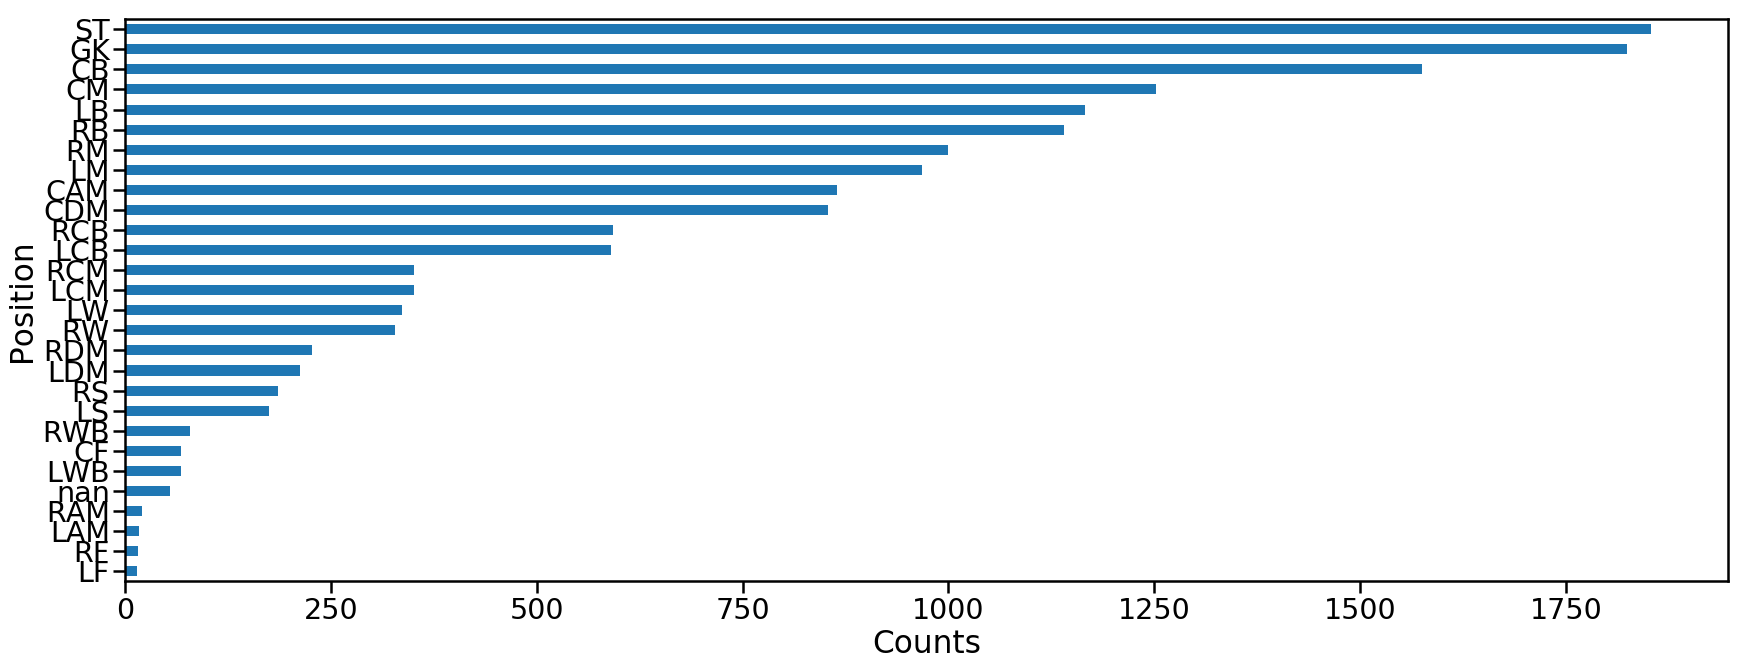

In [658]:
fig, ax = plt.subplots(figsize=(25,10))
ppos.Position.value_counts(dropna=False, ascending=True).plot(kind='barh', ax=ax)
ax.set_ylabel("Position")
ax.set_xlabel("Counts")
fig.tight_layout()

In [659]:
position_types = ppos.Position.unique()
position_types

array(['RCM', 'LF', 'CM', 'LCM', 'CDM', 'GK', 'ST', 'LM', 'CAM', 'CB',
       'RM', 'RDM', 'LCB', 'RS', 'LB', 'RCB', 'LS', 'RW', 'LW', 'RB', nan,
       'RWB', 'LWB', 'LDM', 'CF', 'RF', 'LAM', 'RAM'], dtype=object)

'LW = Left Wing
'RW'=Right Wing

Defensive:

    ** GK = Goalkeeper **
    ** SW Sweeper **
    ** RWB Right Wing Back **
    ** RB Right back
    ** RCB Right center back **
    ** CB Center back **
    ** LCB Left center back **
    ** LB Left back **
    ** LWB Left Wing Back **
Midfielders:

    ** RDM Right defensive midfield **
    ** RCDM Right center defensive midfield **
    ** CDM Center defensive midfield **
    ** LCDM Left center defensive midfield **
    ** LDM Left defensive midfield **
    ** RWM Right Wing Midfield **
    ** RM Right midfield **
    ** RCM Right center midfield **
    ** CM Center Midfield **
    ** LCM Left center midfield **
    ** LM Left midfield **
    ** LWM Left Wing Midfield **
    ** RAM Right attacking midfiel **
    ** RCAM Right center attackingmidfield **
    ** CAM Center attacking midfied **
    ** LCAM Left center attacking idfield **
    ** LAM Left attacking midfield **
Forwards:

    ** RF Right forward **
    ** CF Center forward **
    ** LF Left forward **
    ** RS Right Striker **
    ** ST Striker **
    ** LS Left Striker **

In [660]:
Defense=['LB','CB','LWB','LCB','RB','RWB','LDM','LAM']
Midfield=['CM','CDM','LCM','RDM','LW','RM','CAM','RCM','LM','RW','RAM']
Forward=['ST','LS','RS','CF','LF','RF']
GoalKeeper=['GK']

In [661]:
# modifying dataframe -- adding the aggregated position categorical position_agg
ppos.loc[ppos['Position'].isin(Defense), 'position_agg'] = "Defense"
ppos.loc[ppos['Position'].isin(Midfield), 'position_agg'] = "Midfield"
ppos.loc[ppos['Position'].isin(Forward), 'position_agg'] = "Forward"
ppos.loc[ppos['Position'].isin(GoalKeeper), 'position_agg'] = "GoalKeeper"

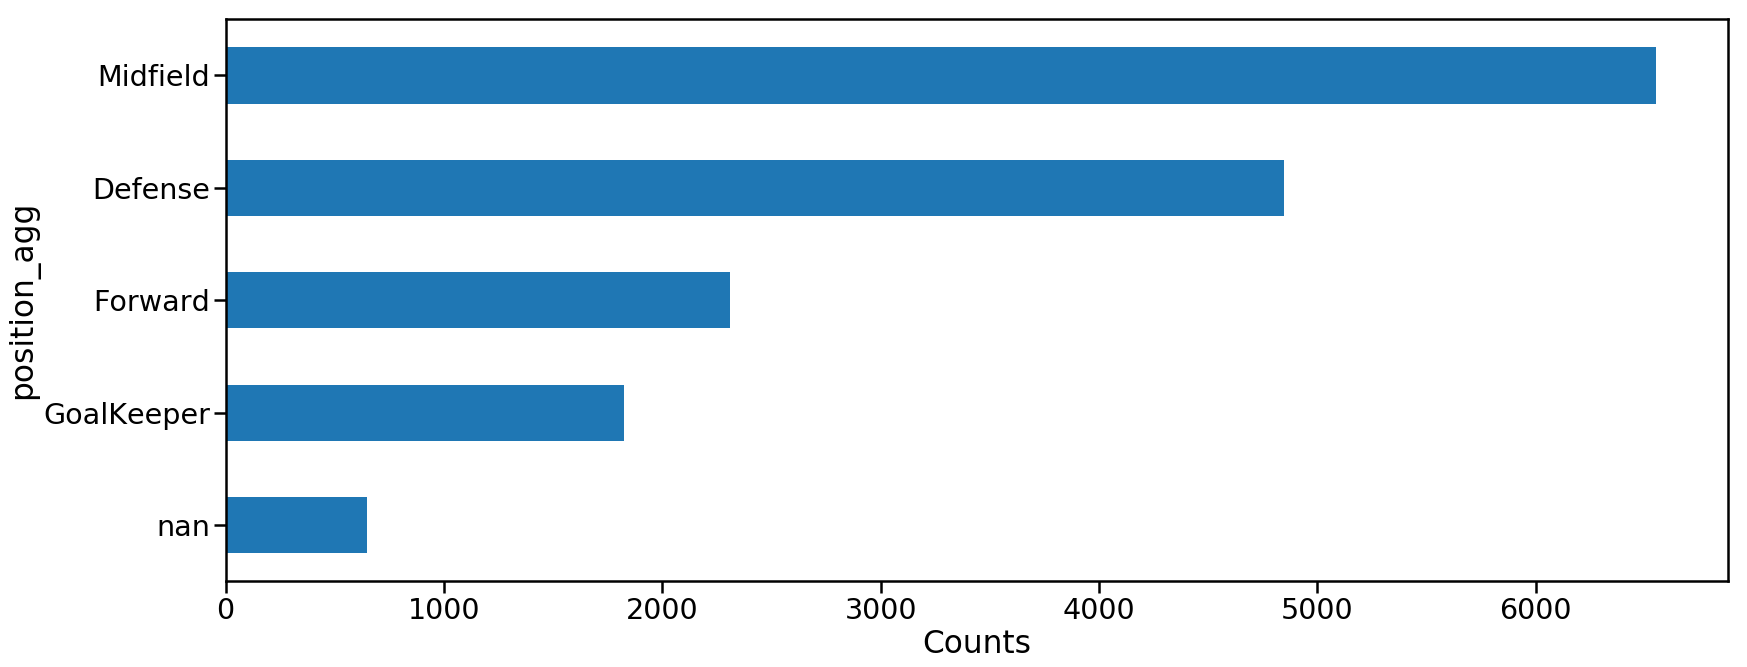

In [662]:
fig, ax = plt.subplots(figsize=(25,10))
ppos['position_agg'].value_counts(dropna=False, ascending=True).plot(kind='barh', ax=ax)
ax.set_ylabel('position_agg')
ax.set_xlabel("Counts")
fig.tight_layout()

In [663]:
ppos.head()

,Name,Age,Nationality,Position,Potential,Club,InternationalReputation,WeakFoot,SkillMoves,WorkRate,ContractValidUntil,position_agg
ID,,,,,,,,,,,,
16,Luis García,37,Spain,RCM,71,KAS Eupen,1.0,4.0,3.0,Medium/ Medium,2019,Midfield
41,Iniesta,34,Spain,LF,86,Vissel Kobe,4.0,4.0,4.0,High/ Medium,2021,Forward
80,E. Belözoğlu,37,Turkey,CM,79,Medipol Başakşehir FK,2.0,4.0,4.0,Medium/ Medium,2019,Midfield
164,G. Pinzi,37,Italy,LCM,70,Padova,2.0,3.0,3.0,Low/ High,2019,Midfield
657,D. Vaughan,35,Wales,CDM,66,Notts County,1.0,3.0,2.0,Medium/ High,2019,Midfield


In [664]:
ppos.columns

Index(['Name', 'Age', 'Nationality', 'Position', 'Potential', 'Club',
       'InternationalReputation', 'WeakFoot', 'SkillMoves', 'WorkRate',
       'ContractValidUntil', 'position_agg'],
      dtype='object')

In [665]:
ppos.position_agg.shape

(16180,)

In [666]:
ppos.dropna(subset=['Position'])

,Name,Age,Nationality,Position,Potential,Club,InternationalReputation,WeakFoot,SkillMoves,WorkRate,ContractValidUntil,position_agg
ID,,,,,,,,,,,,
16,Luis García,37,Spain,RCM,71,KAS Eupen,1.0,4.0,3.0,Medium/ Medium,2019,Midfield
41,Iniesta,34,Spain,LF,86,Vissel Kobe,4.0,4.0,4.0,High/ Medium,2021,Forward
80,E. Belözoğlu,37,Turkey,CM,79,Medipol Başakşehir FK,2.0,4.0,4.0,Medium/ Medium,2019,Midfield
164,G. Pinzi,37,Italy,LCM,70,Padova,2.0,3.0,3.0,Low/ High,2019,Midfield
657,D. Vaughan,35,Wales,CDM,66,Notts County,1.0,3.0,2.0,Medium/ High,2019,Midfield
1179,G. Buffon,40,Italy,GK,88,Paris Saint-Germain,4.0,2.0,1.0,Medium/ Medium,2019,GoalKeeper
2147,M. Stekelenburg,35,Netherlands,GK,73,Everton,2.0,4.0,1.0,Medium/ Medium,2019,GoalKeeper
2335,A. Wilbraham,38,England,ST,63,Rochdale,1.0,3.0,2.0,Medium/ Medium,2019,Forward
2702,K. Ellison,39,England,LM,57,Morecambe,1.0,3.0,2.0,High/ Low,2019,Midfield


In [667]:
ppos.position_agg.shape

(16180,)

In [668]:
ppos.dropna(subset=['position_agg'])

,Name,Age,Nationality,Position,Potential,Club,InternationalReputation,WeakFoot,SkillMoves,WorkRate,ContractValidUntil,position_agg
ID,,,,,,,,,,,,
16,Luis García,37,Spain,RCM,71,KAS Eupen,1.0,4.0,3.0,Medium/ Medium,2019,Midfield
41,Iniesta,34,Spain,LF,86,Vissel Kobe,4.0,4.0,4.0,High/ Medium,2021,Forward
80,E. Belözoğlu,37,Turkey,CM,79,Medipol Başakşehir FK,2.0,4.0,4.0,Medium/ Medium,2019,Midfield
164,G. Pinzi,37,Italy,LCM,70,Padova,2.0,3.0,3.0,Low/ High,2019,Midfield
657,D. Vaughan,35,Wales,CDM,66,Notts County,1.0,3.0,2.0,Medium/ High,2019,Midfield
1179,G. Buffon,40,Italy,GK,88,Paris Saint-Germain,4.0,2.0,1.0,Medium/ Medium,2019,GoalKeeper
2147,M. Stekelenburg,35,Netherlands,GK,73,Everton,2.0,4.0,1.0,Medium/ Medium,2019,GoalKeeper
2335,A. Wilbraham,38,England,ST,63,Rochdale,1.0,3.0,2.0,Medium/ Medium,2019,Forward
2702,K. Ellison,39,England,LM,57,Morecambe,1.0,3.0,2.0,High/ Low,2019,Midfield


In [614]:
ppos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16180 entries, A. Abang to Óscar Whalley
Data columns (total 11 columns):
Age                        16180 non-null int64
Nationality                16180 non-null object
Position                   16126 non-null object
Potential                  16180 non-null int64
Club                       15956 non-null object
InternationalReputation    16136 non-null float64
WeakFoot                   16136 non-null float64
SkillMoves                 16136 non-null float64
WorkRate                   16136 non-null object
ContractValidUntil         15912 non-null object
position_agg               15534 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 2.1+ MB


In [615]:
group_nation=ppos.groupby(['Nationality','position_agg'])[['Age', 'Position', 'Potential', 'Club',
       'InternationalReputation', 'WeakFoot', 'SkillMoves', 'WorkRate',
       'ContractValidUntil']].sum()

In [616]:
group_nation.head()

Age  Potential  InternationalReputation  WeakFoot  \
Nationality position_agg                                                      
Albania     Defense       270        798                     13.0      34.0   
            Forward       128        360                      5.0      16.0   
            GoalKeeper     44        155                      2.0       3.0   
            Midfield      447       1349                     20.0      64.0   
Algeria     Defense       377        998                     16.0      44.0   

                          SkillMoves  
Nationality position_agg              
Albania     Defense             28.0  
            Forward             14.0  
            GoalKeeper           2.0  
            Midfield            49.0  
Algeria     Defense             34.0

In [620]:
# t  = [i not in set(vc[vc=='Algeria'].index) for i in ppos['Nationality']]
# t

In [617]:
gf=pd.concat(g for _, g in ppos.groupby("Nationality") if len(g) > 1)

In [622]:
gf.head()

,Age,Nationality,Position,Potential,Club,InternationalReputation,WeakFoot,SkillMoves,WorkRate,ContractValidUntil,position_agg
Name,,,,,,,,,,,
A. Abrashi,28,Albania,CDM,71,SC Freiburg,1.0,2.0,2.0,High/ High,2020,Midfield
A. Ajdarević,20,Albania,LW,64,Örebro SK,1.0,2.0,3.0,Medium/ Low,2021,Midfield
A. Fejzullahu,25,Albania,RB,65,Neuchâtel Xamax,1.0,3.0,2.0,Medium/ Medium,2019,Defense
A. Mucolli,18,Albania,CM,78,Vejle Boldklub,1.0,4.0,3.0,High/ Medium,2020,Midfield
A. Sadiku,27,Albania,ST,70,Levante UD,1.0,2.0,3.0,Medium/ Low,2020,Forward


In [627]:
ppos['Nationality'].value_counts()

England                1412
Germany                1153
Spain                   967
France                  863
Argentina               779
Brazil                  717
Italy                   682
Netherlands             446
Japan                   440
Colombia                438
China PR                380
Sweden                  363
Poland                  340
Republic of Ireland     327
Korea Republic          325
Norway                  321
Chile                   317
Denmark                 312
Saudi Arabia            311
United States           309
Austria                 294
Portugal                291
Turkey                  283
Mexico                  257
Belgium                 257
Scotland                249
Switzerland             212
Australia               211
Croatia                 122
Uruguay                 121
                       ... 
Tunisia                  32
Bulgaria                 32
Kosovo                   32
Mali                     31
Egypt               

In [670]:
df_dup = ppos.loc[ppos['Nationality'] == 'Honduras']

In [671]:
df_dup

,Name,Age,Nationality,Position,Potential,Club,InternationalReputation,WeakFoot,SkillMoves,WorkRate,ContractValidUntil,position_agg
ID,,,,,,,,,,,,
186674,R. Espinoza,31,Honduras,RCM,72,Sporting Kansas City,1.0,4.0,3.0,High/ High,2020,Midfield
196946,E. Izaguirre,32,Honduras,LB,68,Celtic,1.0,3.0,3.0,High/ Medium,2019,Defense
198564,Jona,29,Honduras,ST,70,CD Lugo,1.0,3.0,3.0,Medium/ Medium,"Jun 30, 2019",Forward
198705,A. Najar,25,Honduras,RB,76,RSC Anderlecht,2.0,4.0,4.0,High/ Medium,2020,Defense
205495,A. Lozano,25,Honduras,ST,79,Girona FC,1.0,3.0,3.0,Medium/ Low,2022,Forward
210321,R. Quioto,26,Honduras,LM,72,Houston Dynamo,1.0,3.0,3.0,High/ Medium,2022,Midfield
219285,B. Beckeles,32,Honduras,RB,69,Club Necaxa,1.0,3.0,2.0,Medium/ High,2023,Defense
226299,B. Róchez,23,Honduras,ST,76,CD Nacional,1.0,2.0,3.0,Medium/ Low,2020,Forward
236245,A. Elis,22,Honduras,RM,82,Houston Dynamo,1.0,4.0,4.0,High/ Medium,2021,Midfield


In [686]:
mel_count=df_dup['Position'].str.contains('RB').sum()
if mel_count>0:
    print ("There are {m} Mels".format(m=mel_count))

There are 3 Mels


In [700]:
for x in df_dup['Position']:
    if x == 'RB':
        print(x)

RB
RB
RB


In [719]:
df_dup.loc[lambda df_dup: df_dup['Position'] == 'RB']

,Name,Age,Nationality,Position,Potential,Club,InternationalReputation,WeakFoot,SkillMoves,WorkRate,ContractValidUntil,position_agg
ID,,,,,,,,,,,,
198564,Jona,29,Honduras,ST,70,CD Lugo,1.0,3.0,3.0,Medium/ Medium,"Jun 30, 2019",Forward
205495,A. Lozano,25,Honduras,ST,79,Girona FC,1.0,3.0,3.0,Medium/ Low,2022,Forward
226299,B. Róchez,23,Honduras,ST,76,CD Nacional,1.0,2.0,3.0,Medium/ Low,2020,Forward


In [709]:
def func():
    players_place=input('Enter a postion for a player:')
    for x in df_dup['Position']:
        if x== players_place:
            print(x)
    

In [710]:
func()

Enter a postion for a player:RB


In [ ]:
players_place=input('Enter a postion for a player:')

### Player count for position 
    1. We will check how many players are working on perticular postion 

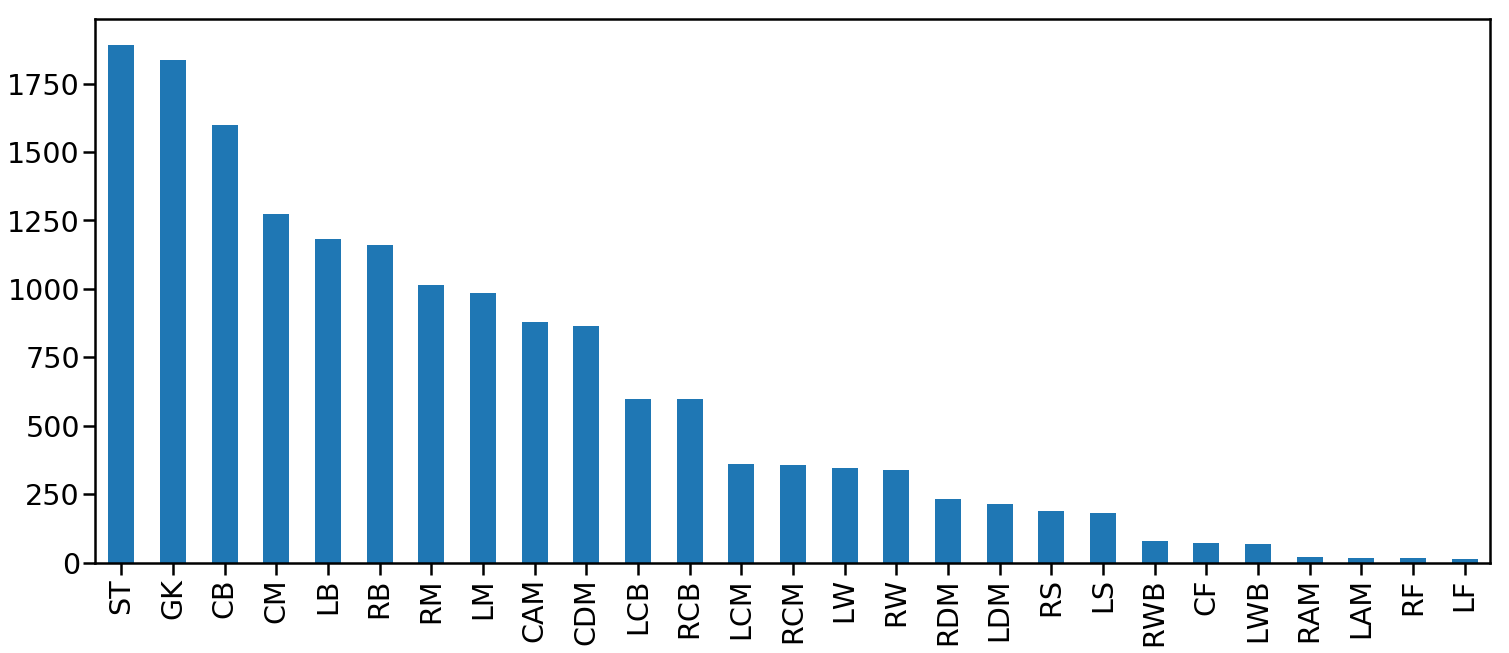

In [391]:

ppos['Position'].value_counts().plot.bar(figsize=(25,10))


In [392]:
ppos['Position'].value_counts()


ST     1891
GK     1835
CB     1599
CM     1272
LB     1181
RB     1161
RM     1013
LM      984
CAM     879
CDM     864
LCB     598
RCB     597
LCM     360
RCM     355
LW      345
RW      337
RDM     232
LDM     216
RS      189
LS      181
RWB      80
CF       71
LWB      70
RAM      20
LAM      18
RF       16
LF       14
Name: Position, dtype: int64

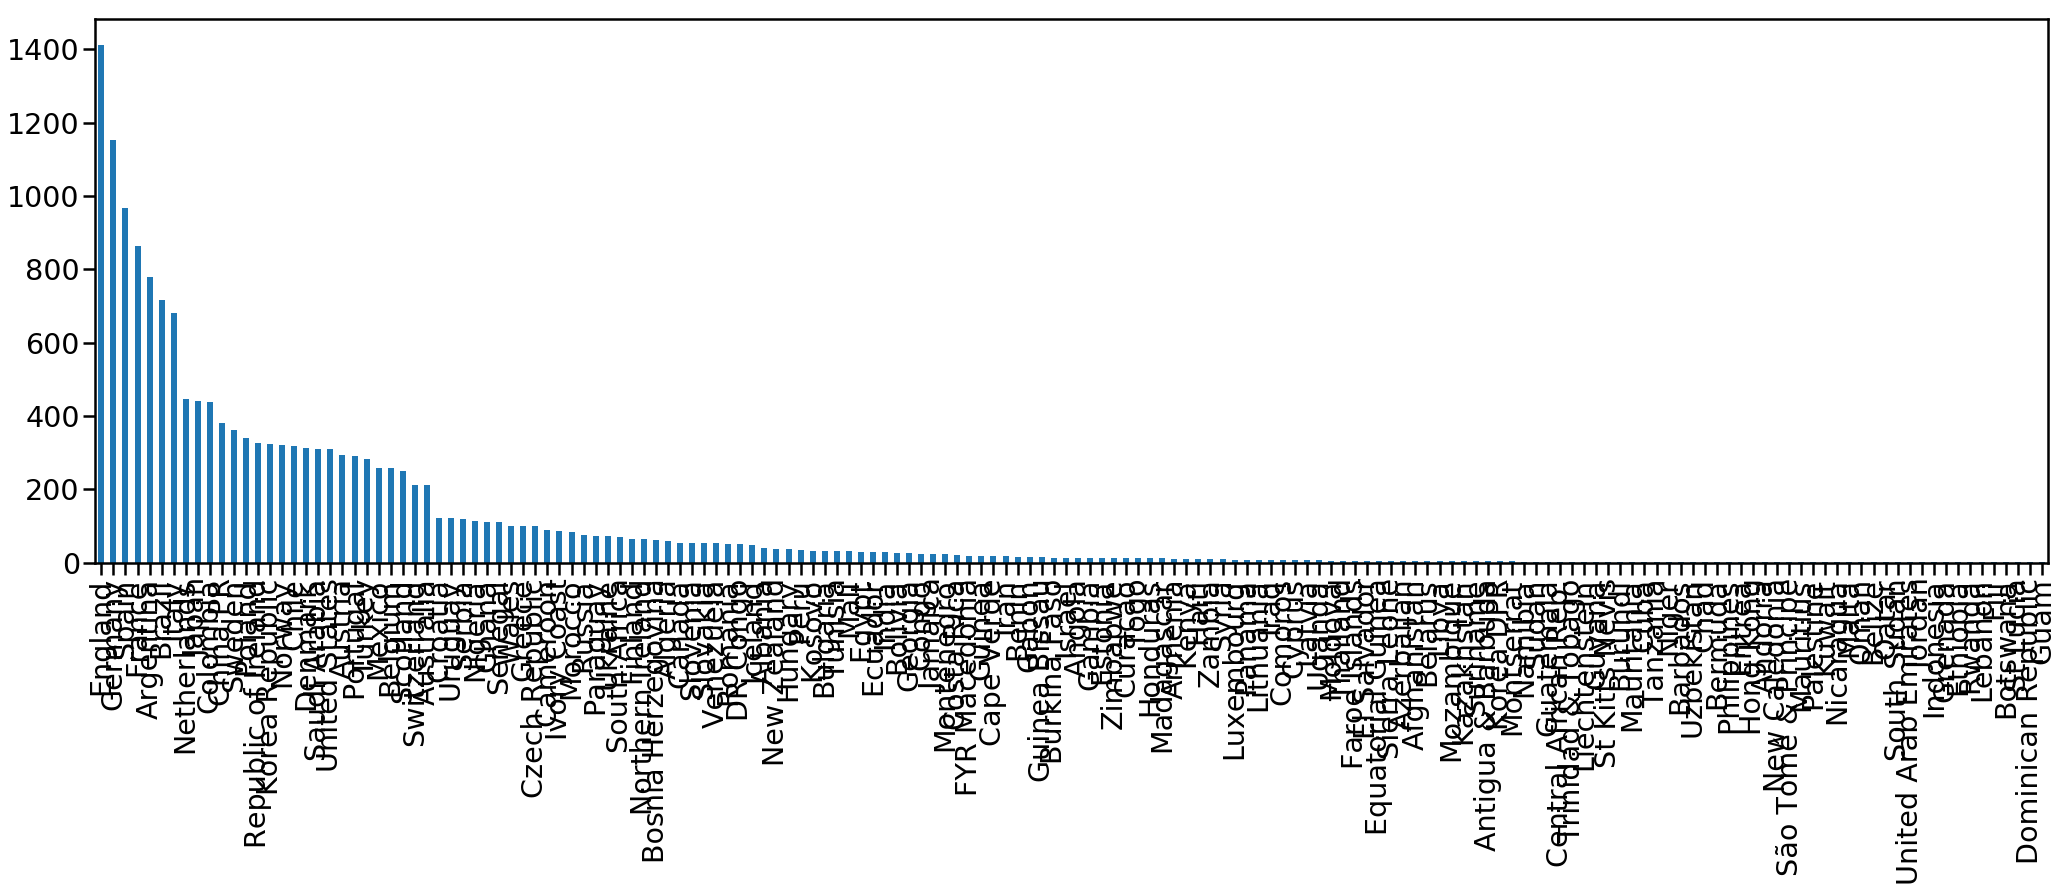

In [394]:
ppos['Nationality'].value_counts().plot.bar(figsize=(35,10))

### Players country to position ratio
    Total how many players are in perticular country
    How many players for that perticular position 